In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint

gspc_df = pd.read_csv('^GSPC.csv')
gspc_df['Date'] = pd.to_datetime(gspc_df['Date'])
gspc_df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
408,2023-09-01,4530.600098,4541.250000,4501.350098,4515.770020,4515.770020,3246260000
409,2023-09-05,4510.060059,4514.290039,4496.009766,4496.830078,4496.830078,3526250000
410,2023-09-06,4490.350098,4490.350098,4442.379883,4465.479980,4465.479980,3418850000
411,2023-09-07,4434.549805,4457.810059,4430.459961,4451.140137,4451.140137,3763760000
412,2023-09-08,4451.299805,4473.529785,4448.379883,4457.490234,4457.490234,3259290000


In [2]:
gspc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-18,4632.240234,4632.240234,4568.700195,4577.109863,4577.109863,4748700000
1,2022-01-19,4588.029785,4611.549805,4530.200195,4532.759766,4532.759766,4465740000
2,2022-01-20,4547.350098,4602.109863,4477.950195,4482.729980,4482.729980,4640870000
3,2022-01-21,4471.379883,4494.520020,4395.339844,4397.939941,4397.939941,5589100000
4,2022-01-24,4356.319824,4417.350098,4222.620117,4410.129883,4410.129883,6928110000


In [3]:
caseshill_df = pd.read_csv('CSUSHPISA.csv')
caseshill_df['DATE'] = pd.to_datetime(caseshill_df['DATE'])
caseshill_df.columns = ['Date', 'Case-Shiller']
caseshill_df.tail()

,Date,Case-Shiller
433,2023-02-01,296.958
434,2023-03-01,298.210
435,2023-04-01,300.214
436,2023-05-01,302.657
437,2023-06-01,304.635


In [4]:
caseshill_df.head()

,Date,Case-Shiller
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.131
4,1987-05-01,65.563


In [5]:
cut_off_date = '1987-01-01' 

gspc_df = gspc_df[gspc_df['Date'] >= cut_off_date]
caseshill_df = caseshill_df[caseshill_df['Date'] >= cut_off_date]
 
print('gspc_df.shape():',gspc_df.shape)
print('caseshill_df.shape():',caseshill_df.shape)

gspc_df.shape(): (413, 7)
caseshill_df.shape(): (438, 2)


In [6]:
# look for outliers 
caseshill_df[~(np.abs(caseshill_df['Case-Shiller']-caseshill_df['Case-Shiller'].mean()) < (3*caseshill_df['Case-Shiller'].std()))]

,Date,Case-Shiller


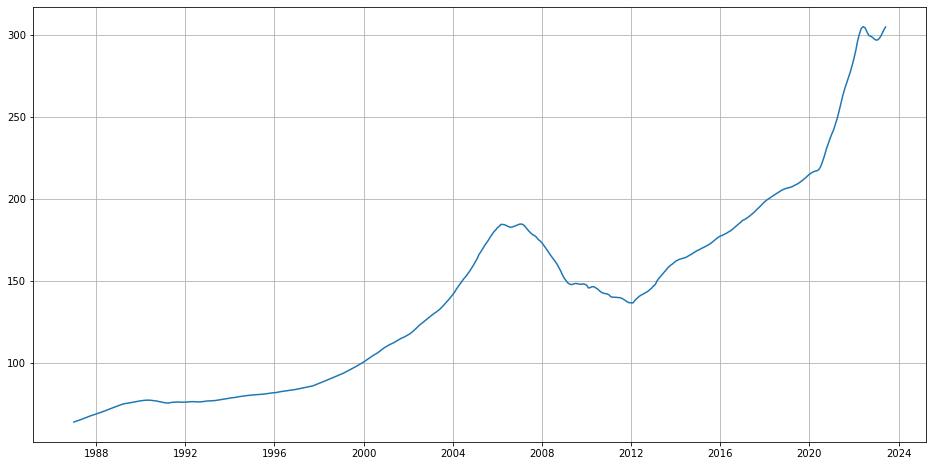

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(caseshill_df['Date'], caseshill_df['Case-Shiller'])
plt.grid()
plt.show()

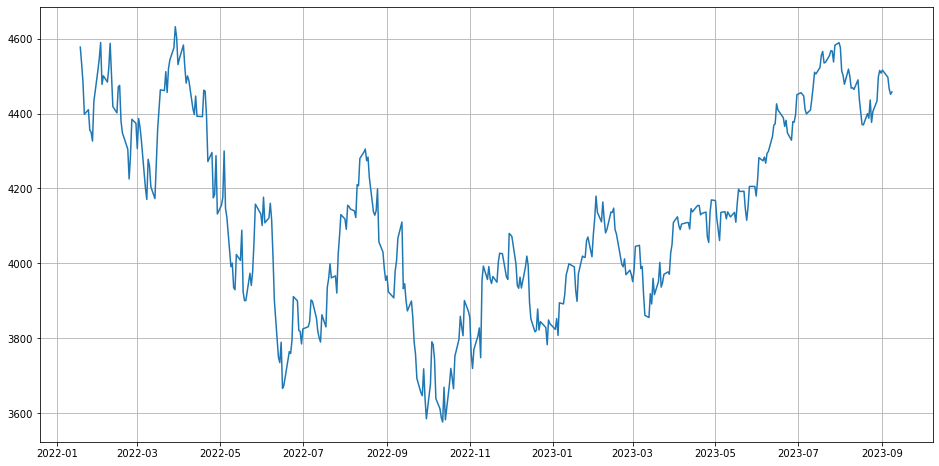

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(gspc_df['Date'], gspc_df['Adj Close'])
plt.grid()
plt.show()

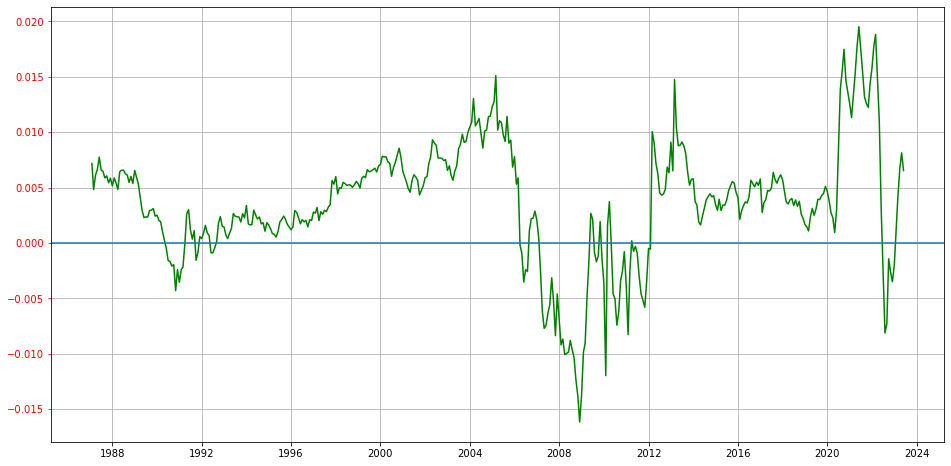

In [9]:
# CPI Perecent Change
fig, ax = plt.subplots(figsize=(16, 8))
caseshill_df['Case-Shiller_pct_change'] = caseshill_df['Case-Shiller'].pct_change().copy()
plt.plot(caseshill_df['Date'], caseshill_df['Case-Shiller_pct_change'], c='green')
ax.tick_params('y', colors='r')
plt.grid()
plt.axhline(0)
plt.show()

In [10]:
# join both datasets together
together = pd.merge(gspc_df, 
                    caseshill_df[['Date','Case-Shiller','Case-Shiller_pct_change']], 
                    on= ['Date'], how='left')

# last valid observation forward
together = together.fillna(method='ffill')
 
# drop NAs
together = together.dropna(axis=0)

together.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Case-Shiller,Case-Shiller_pct_change
10,2022-02-01,4519.569824,4550.490234,4483.529785,4546.540039,4546.540039,4816830000,290.795,0.017805
11,2022-02-02,4566.390137,4595.310059,4544.319824,4589.379883,4589.379883,4481580000,290.795,0.017805
12,2022-02-03,4535.410156,4542.879883,4470.390137,4477.439941,4477.439941,4401970000,290.795,0.017805
13,2022-02-04,4482.790039,4539.660156,4451.500000,4500.529785,4500.529785,4706290000,290.795,0.017805
14,2022-02-07,4505.750000,4521.859863,4471.470215,4483.870117,4483.870117,4228480000,290.795,0.017805
15,2022-02-08,4480.020020,4531.319824,4465.399902,4521.540039,4521.540039,4459620000,290.795,0.017805
16,2022-02-09,4547.000000,4590.029785,4547.000000,4587.180176,4587.180176,4524350000,290.795,0.017805
17,2022-02-10,4553.240234,4588.919922,4484.310059,4504.080078,4504.080078,5314860000,290.795,0.017805
18,2022-02-11,4506.270020,4526.330078,4401.410156,4418.640137,4418.640137,5251500000,290.795,0.017805
19,2022-02-14,4412.609863,4426.220215,4364.839844,4401.669922,4401.669922,4600390000,290.795,0.017805


No handles with labels found to put in legend.


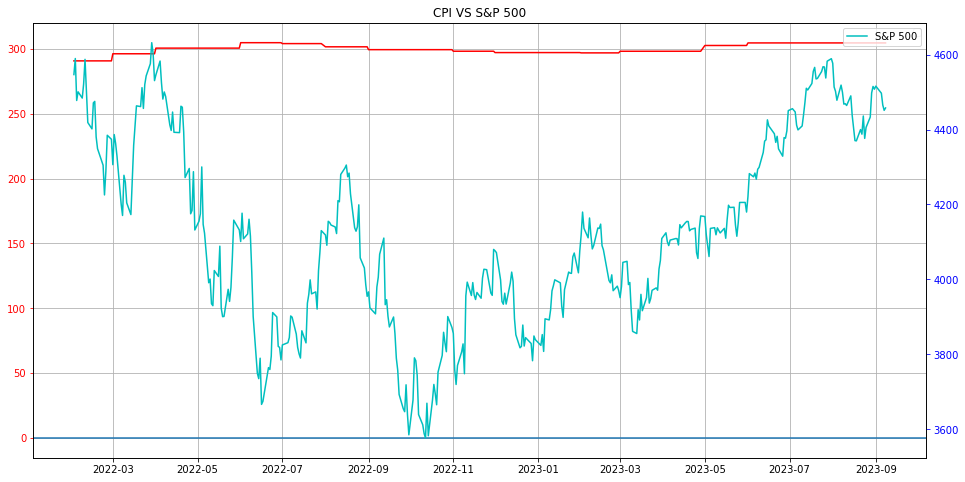

In [11]:
# join both datasets together
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(together['Date'], 
         together['Case-Shiller'], color='r')
plt.legend()
plt.grid()
plt.axhline(0)
ax.tick_params('y', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(together['Date'], 
         together['Adj Close']
         , 'c', label='S&P 500')
plt.legend()
plt.title('CPI VS S&P 500')
ax2.tick_params('y', colors='b')

No handles with labels found to put in legend.


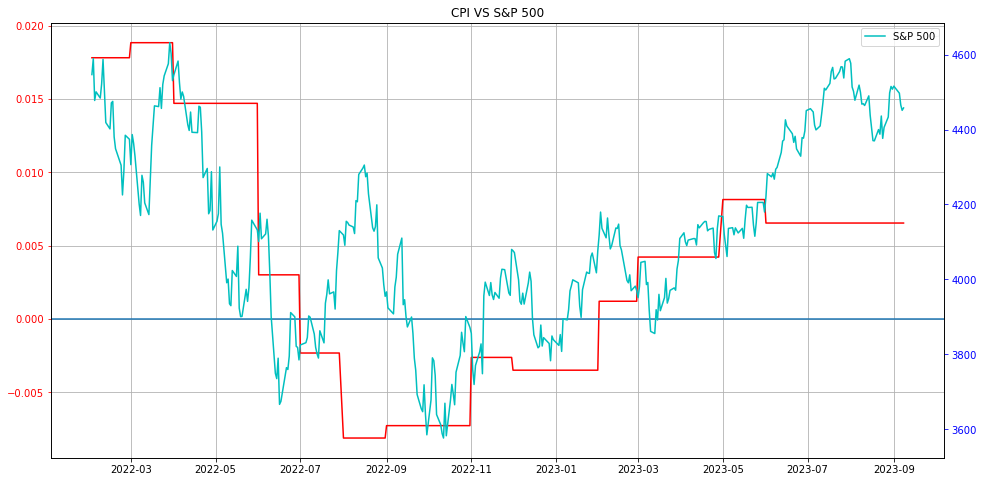

In [12]:
# join both datasets together
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(together['Date'], 
         together['Case-Shiller_pct_change'], color='r')
plt.legend()
plt.grid()
plt.axhline(0)
ax.tick_params('y', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(together['Date'], 
         together['Adj Close']
         , 'c', label='S&P 500')
plt.legend()
plt.title('CPI VS S&P 500')
ax2.tick_params('y', colors='b')

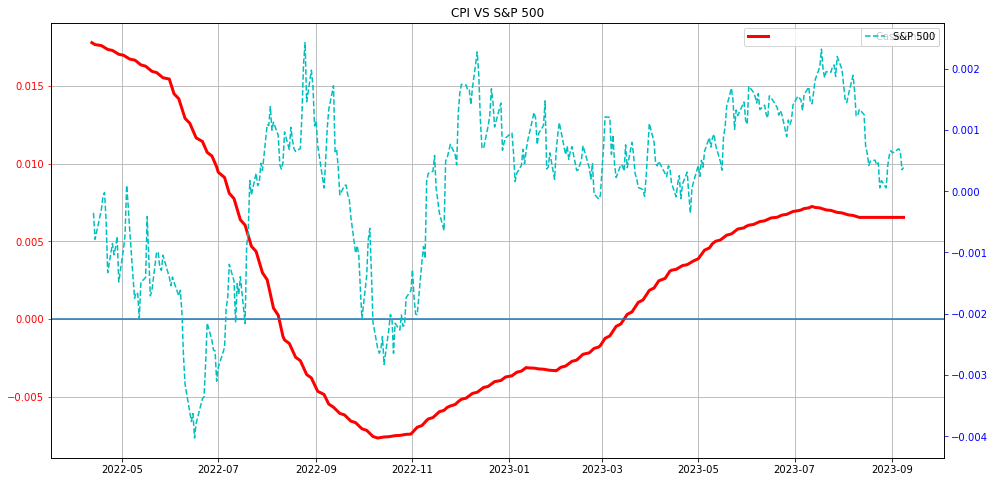

In [13]:
# join both datasets together
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(together['Date'], together['Case-Shiller_pct_change'].rolling(window=50).mean().values, color='r',
         linewidth=3, label='                                Case-Shiller')
plt.legend()
plt.grid()
plt.axhline(0)
ax.tick_params('y', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(together['Date'], 
         together['Adj Close'].pct_change().rolling(window=50).mean().values
         , 'c--', label='S&P 500')
plt.legend()
plt.title('CPI VS S&P 500')
ax2.tick_params('y', colors='b')

In [14]:
# Group raw Case-Shiller data
caseshill_df = pd.read_csv('CSUSHPISA.csv')
caseshill_df['DATE'] = pd.to_datetime(caseshill_df['DATE'])
caseshill_df.columns = ['Date', 'Case-Shiller']
caseshill_df.head()

,Date,Case-Shiller
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.131
4,1987-05-01,65.563


In [15]:
cpi_df = pd.read_csv('CSUSHPISA.csv')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
cpi_df.columns = ['Date', 'CPI']
# offset the date to the first of the month to match both sets
#cpi_df['Date'] = cpi_df['Date'] + pd.offsets.MonthBegin(1)
print(cpi_df.shape)
#set(list(cpi_df['Date'].dt.year.values))
cpi_df.tail()


(438, 2)


,Date,CPI
433,2023-02-01,296.958
434,2023-03-01,298.210
435,2023-04-01,300.214
436,2023-05-01,302.657
437,2023-06-01,304.635


In [16]:
caseshill_df = pd.read_csv('CSUSHPISA.csv')
caseshill_df['DATE'] = pd.to_datetime(caseshill_df['DATE'])
caseshill_df.columns = ['Date', 'Case-Shiller']
# offset the date to the first of the month to match both sets
caseshill_df['Date'] = caseshill_df['Date'] + pd.offsets.MonthBegin(1)

# adjust to actual dollar amount
caseshill_df['Case-Shiller'] *= 100


print(caseshill_df.shape)
caseshill_df.head()

(438, 2)


,Date,Case-Shiller
0,1987-02-01,6396.5
1,1987-03-01,6442.4
2,1987-04-01,6473.5
3,1987-05-01,6513.1
4,1987-06-01,6556.3


In [17]:
cut_off_date = '1987-02-01'
caseshill_df = caseshill_df[caseshill_df['Date'] >= cut_off_date]
cpi_df = cpi_df[cpi_df['Date'] >= cut_off_date]

In [18]:
# join both datasets together
print('caseshill_df.shape():',caseshill_df.shape)
print('cpi_df.shape():',cpi_df.shape)
together = pd.merge(caseshill_df[['Date','Case-Shiller']], 
                    cpi_df[['Date','CPI']], 
                    on= ['Date'], how='inner')

# last valid observation forward
together.columns = ['Date', 'Case-Shiller', 'CPI']

# drop NAs
together = together.dropna(axis=0)
together.head()
 

caseshill_df.shape(): (438, 2)
cpi_df.shape(): (437, 2)


,Date,Case-Shiller,CPI
0,1987-02-01,6396.5,64.424
1,1987-03-01,6442.4,64.735
2,1987-04-01,6473.5,65.131
3,1987-05-01,6513.1,65.563
4,1987-06-01,6556.3,66.071


In [19]:
# base CPI as of today 
ref_cpi_price =  251.712

together['Case-Shiller-CPI-Adj'] = together['Case-Shiller'] / together['CPI'] * ref_cpi_price

together.tail()

,Date,Case-Shiller,CPI,Case-Shiller-CPI-Adj
432,2023-02-01,29660.1,296.958,25140.939430
433,2023-03-01,29695.8,298.210,25065.521644
434,2023-04-01,29821.0,300.214,25003.176241
435,2023-05-01,30021.4,302.657,24968.022008
436,2023-06-01,30265.7,304.635,25007.762990


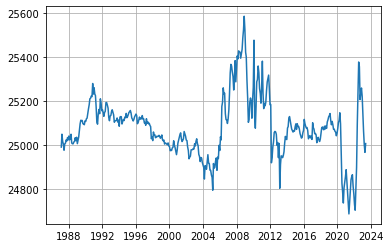

In [20]:
plt.plot(together['Date'], together['Case-Shiller-CPI-Adj'])
plt.grid()

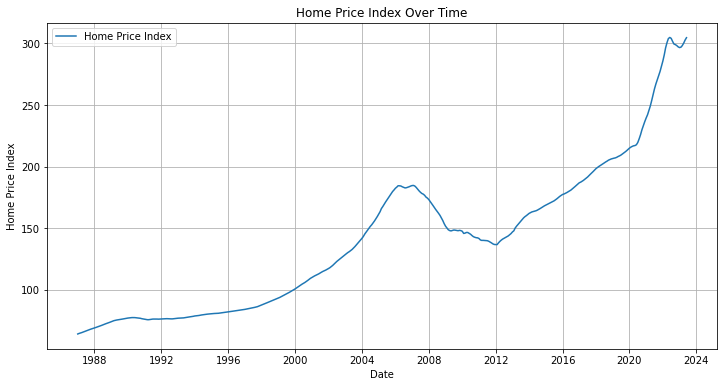

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('CSUSHPISA.csv')  # Replace 'your_dataset.csv' with your actual file path

# Convert the 'DATE' column to a datetime data type
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the 'DATE' column as the index
data.set_index('DATE', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CSUSHPISA'], label='Home Price Index')
plt.title('Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
print(data.head())


         DATE  CSUSHPISA
0  1987-01-01     63.965
1  1987-02-01     64.424
2  1987-03-01     64.735
3  1987-04-01     65.131
4  1987-05-01     65.563
